ASSIGNMENT - 6

# Implementation and Comparison of Various Clustering Techniques:
# Spectral Clustering & DBSCAN on Wine Dataset


In [ ]:
# Step 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Step 2: Load and Inspect Dataset

data = pd.read_csv("wine-clustering.csv")

print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values per Column:")
print(data.isnull().sum())

First 5 rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2  

In [ ]:
# Step 3: Data Preprocessing

# Remove non-numeric or categorical columns if any
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values (if any)
numeric_data = numeric_data.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

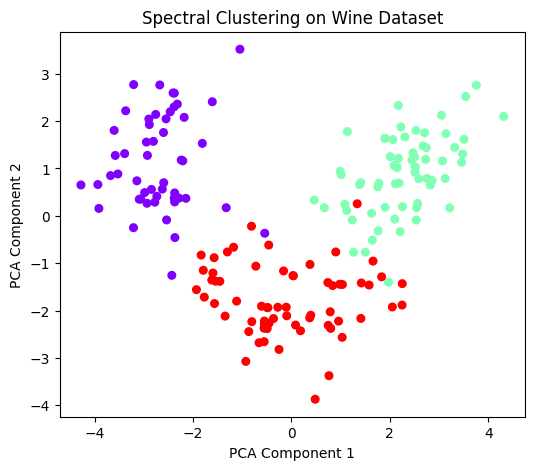

In [ ]:
# Step 4: Spectral Clustering

spectral = SpectralClustering(
    n_clusters=3,
    assign_labels='kmeans',
    affinity='nearest_neighbors',
    random_state=42
)
spectral_labels = spectral.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='rainbow', s=30)
plt.title("Spectral Clustering on Wine Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

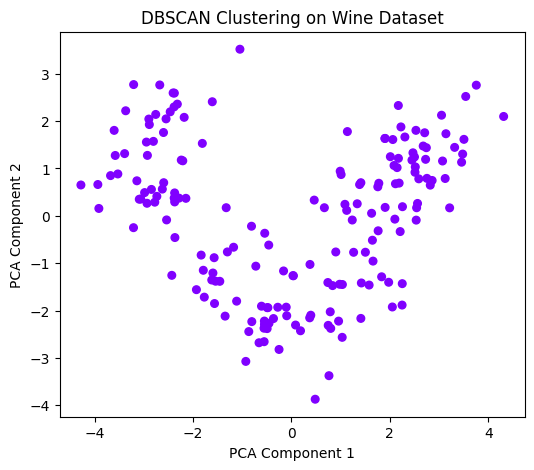

In [ ]:
# Step 5: DBSCAN Clustering

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', s=30)
plt.title("DBSCAN Clustering on Wine Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


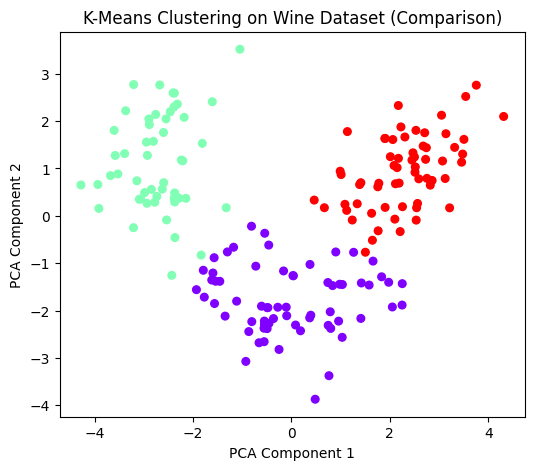

In [ ]:
# Step 6: K-Means for Comparison

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', s=30)
plt.title("K-Means Clustering on Wine Dataset (Comparison)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
# Step 7: Evaluate Models

print("\n--- Evaluation Metrics ---")
print("K-Means Silhouette Score     :", silhouette_score(X_scaled, kmeans_labels))
print("Spectral Clustering Score    :", silhouette_score(X_scaled, spectral_labels))

if len(set(dbscan_labels)) > 1:
    print("DBSCAN Silhouette Score      :", silhouette_score(X_scaled, dbscan_labels))
else:
    print("DBSCAN Silhouette Score      : Not applicable (all noise or single cluster)")


--- Evaluation Metrics ---
K-Means Silhouette Score     : 0.2848589191898987
Spectral Clustering Score    : 0.2828499553125854
DBSCAN Silhouette Score      : Not applicable (all noise or single cluster)


In [ ]:
# Step 8: Summary

print("\n--- Summary ---")
print("1. Spectral Clustering effectively handles non-linear structures in the wine dataset.")
print("2. DBSCAN detects noise/outliers and can discover clusters of arbitrary shape.")
print("3. K-Means provides a baseline for performance comparison but assumes spherical clusters.")


# Step 9: Conclusion

print("\nConclusion:")
print("Using the wine dataset, we observed that Spectral Clustering and DBSCAN reveal deeper structural patterns compared to K-Means. "
      "DBSCAN identifies noisy samples effectively, while Spectral Clustering performs well on non-linearly separable data.")



--- Summary ---
1. Spectral Clustering effectively handles non-linear structures in the wine dataset.
2. DBSCAN detects noise/outliers and can discover clusters of arbitrary shape.
3. K-Means provides a baseline for performance comparison but assumes spherical clusters.

Conclusion:
Using the wine dataset, we observed that Spectral Clustering and DBSCAN reveal deeper structural patterns compared to K-Means. DBSCAN identifies noisy samples effectively, while Spectral Clustering performs well on non-linearly separable data.
